<a href="https://colab.research.google.com/github/SanjitaPrajapati/AI4CCEE_Fall_2024/blob/main/mini_project/MiniProject_1/Submission/sanjita_miniproject_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preparation and Visualization

In [2]:
#Install Dependencies
!pip install osmnx geopandas requests
!pip install pandas geopandas numpy
!pip install geopandas numpy matplotlib seaborn pysal
!pip install descartes
!pip install contextily


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.2 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 35.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Streaming output truncated to the last 5000 lines.


<Axes: >

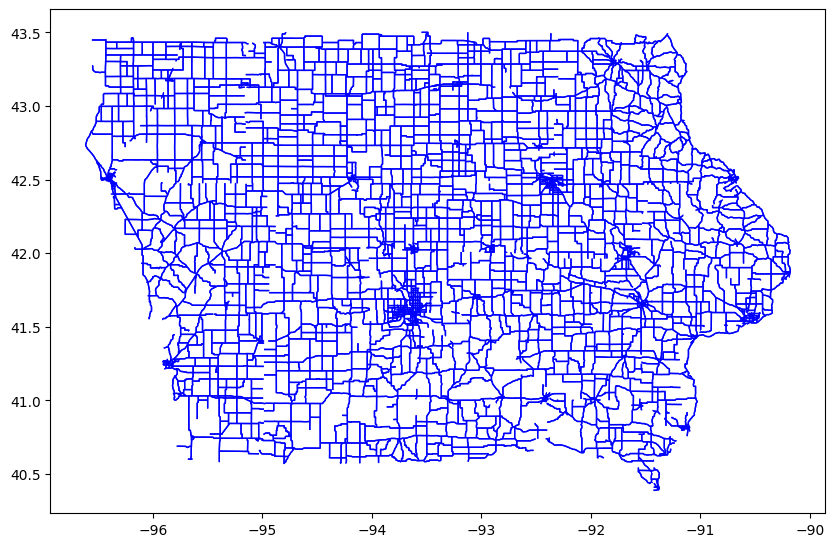

In [3]:
import osmnx as ox
import geopandas as gpd

# Set up your area of interest (Iowa)
place_name = "Iowa, USA"

# Define the custom Overpass query to filter arterial roads (primary and secondary) with lanes >= 2
custom_filter = ('["highway"~"primary|secondary"]')

# Retrieve the road network
# Retrieve the road network
G = ox.graph_from_place(place_name, network_type='all', custom_filter=custom_filter)

# Convert the graph to a GeoDataFrame
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

# Optional: Save the multilane arterial roads to a file (e.g., GeoJSON or Shapefile)
gdf_edges.to_file("iowa_multilane_arterial_roads.geojson", driver="GeoJSON")

# Plot the multilane arterial roads
gdf_edges.plot(figsize=(10, 10), linewidth=1, edgecolor='blue')

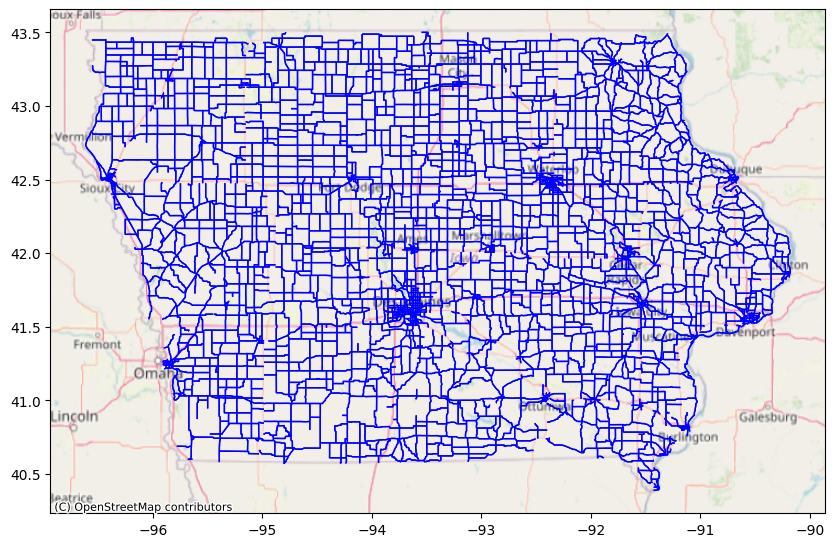

In [4]:
import contextily as ctx

# Plot the multilane arterial roads
ax = gdf_edges.plot(figsize=(10, 10), linewidth=1, edgecolor='blue')

# Add a basemap using contextily
ctx.add_basemap(ax, crs=gdf_edges.crs, source=ctx.providers.OpenStreetMap.Mapnik)

# Display the plot
# plt.show()

## Hotspot and Data Visualization


In [6]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load pedestrian fatalities data
df = pd.read_csv("/content/drive/MyDrive/combined_output (1).csv")
# df_pedestrian_fatalities = df[(df['PER_TYP'] == 5) & (df['INJ_SEV'] == 4) & (df["STATENAME_x"]=='Iowa')]
df_pedestrian_fatalities = df[(df["STATENAME_x"]=='Iowa')]

# Convert latitude/longitude into a GeoDataFrame
geometry = [Point(xy) for xy in zip(df_pedestrian_fatalities['LONGITUD'], df_pedestrian_fatalities['LATITUDE'])]
gdf_pedestrian_fatalities = gpd.GeoDataFrame(df_pedestrian_fatalities, geometry=geometry)

# Set the coordinate system (assuming WGS84)
gdf_pedestrian_fatalities.crs = {'init': 'epsg:4326'}

<ipython-input-6-4f603ada3e7d>:6: DtypeWarning: Columns (15,28,84,86,88,90,92,94,116,118,120,126,152,166,168,170,190,192,197,212,214,216,219,221,223,225,227,229,231,233,235) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/combined_output (1).csv")
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [7]:
# prompt: check the length of df_pedestrian_fatalities

print(len(df_pedestrian_fatalities))
print(df_pedestrian_fatalities)


2729
        STATE_x STATENAME_x  ST_CASE  VE_FORMS_x  VEH_NO  PER_NO  STR_VEH  \
34137        19        Iowa   190001           1       1       1        0   
34138        19        Iowa   190001           1       1       2        0   
34139        19        Iowa   190002           1       1       1        0   
34140        19        Iowa   190003           1       1       1        0   
34141        19        Iowa   190004           1       1       1        0   
...         ...         ...      ...         ...     ...     ...      ...   
287940       19        Iowa   190310           1       1       1        0   
287941       19        Iowa   190310           1       1       2        0   
287942       19        Iowa   190311           1       1       1        0   
287943       19        Iowa   190312           1       1       1        0   
287944       19        Iowa   190313           1       1       1        0   

        COUNTY_x  DAY_x  DAYNAME_x  ...  VPICMODEL  VPICMODELNAME  \
3

In [7]:
print(gdf_pedestrian_fatalities['LONGITUD'])


34137    -96.488917
34138    -96.488917
34139    -92.825047
34140    -92.952981
34141    -95.904600
            ...    
287940   -94.041672
287941   -94.041672
287942   -93.394486
287943   -93.957458
287944   -92.340989
Name: LONGITUD, Length: 2729, dtype: float64


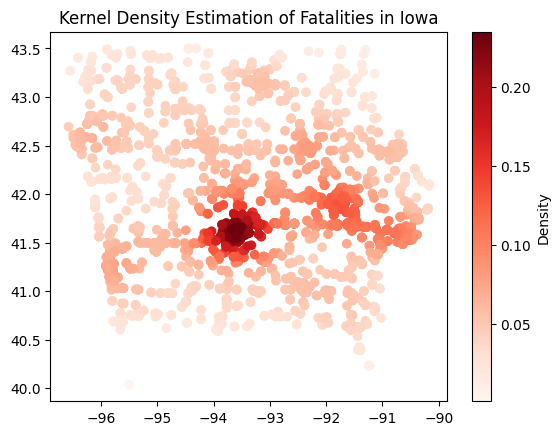

In [8]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
gdf_pedestrian_fatalities = gdf_pedestrian_fatalities.dropna(subset=['LONGITUD', 'LATITUDE'])
# Extract coordinates
coords = np.vstack([gdf_pedestrian_fatalities.geometry.x, gdf_pedestrian_fatalities.geometry.y])

# Apply KDE
kde = gaussian_kde(coords)
density = kde(coords)
gdf_pedestrian_fatalities['density'] = density
# Plot KDE results
plt.scatter(gdf_pedestrian_fatalities.geometry.x, gdf_pedestrian_fatalities.geometry.y, c=density, cmap='Reds')
plt.colorbar(label='Density')
plt.title("Kernel Density Estimation of Fatalities in Iowa")
plt.show()

gdf_pedestrian_fatalities.to_csv('pedestrian_fatalities.csv', index=False)


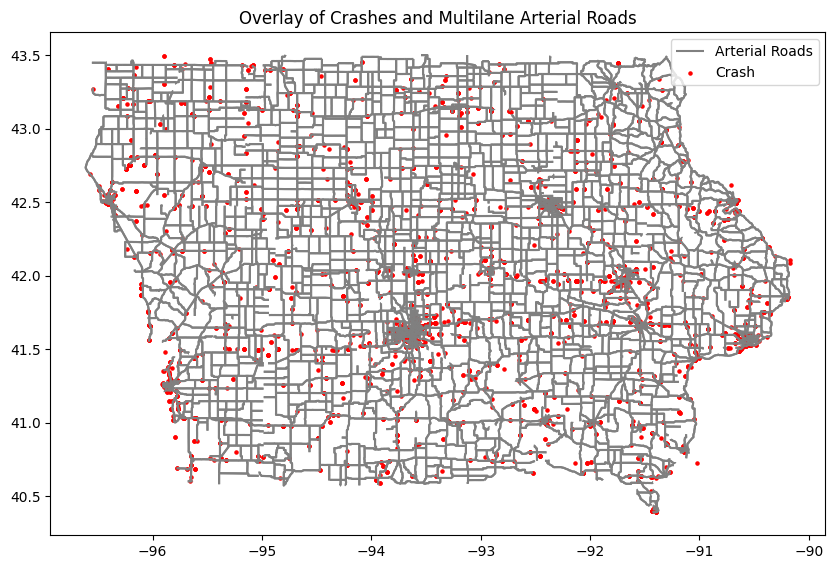

In [10]:
# Load multilane arterial roads
arterial_roads = gpd.read_file("/content/iowa_multilane_arterial_roads.geojson")

hotspots = gdf_pedestrian_fatalities[gdf_pedestrian_fatalities['density'] > 0.015]
# Plot arterial roads and hotspots
fig, ax = plt.subplots(figsize=(10, 8))
arterial_roads.plot(ax=ax, color='gray', label='Arterial Roads')
hotspots.plot(ax=ax, color='red', markersize=5, label='Crash')
plt.legend()
plt.title("Overlay of Crashes and Multilane Arterial Roads")
plt.show()


hotspots.to_csv('hotspots.csv', index=False)

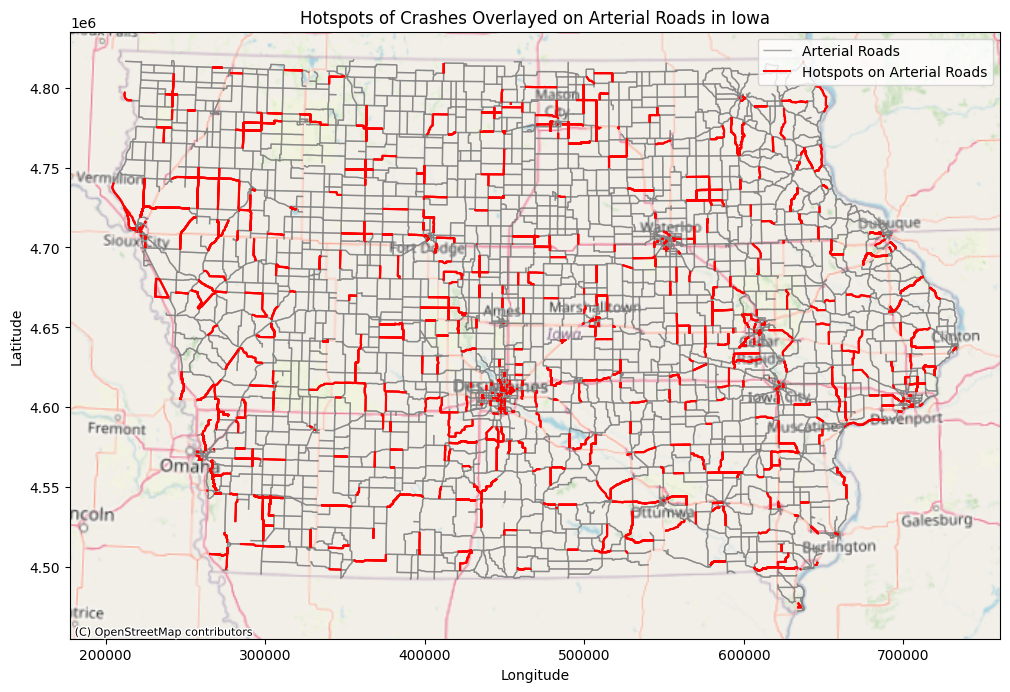

In [12]:
# Load multilane arterial roads
arterial_roads = gpd.read_file("/content/iowa_multilane_arterial_roads.geojson")

# Define a threshold for hotspot identification (adjust as needed)
density_threshold = 0.001  # Example threshold

# Identify hotspots based on the density threshold
hotspots = gdf_pedestrian_fatalities[gdf_pedestrian_fatalities['density'] > density_threshold]

# Project both GeoDataFrames to a suitable projected CRS for accurate spatial operations
#  (e.g., UTM zone appropriate for Iowa)
# Example using EPSG:26915 (NAD83 / UTM zone 15N)
try:
    arterial_roads = arterial_roads.to_crs(epsg=26915)
    hotspots = hotspots.to_crs(epsg=26915)
except Exception as e:
    print(f"Error during CRS projection: {e}")
    # Handle the error appropriately, e.g., use a different CRS or skip the projection


# Overlay hotspots on arterial roads using spatial join
# We'll use a buffer around the hotspots to account for the spatial uncertainty
buffer_distance = 50  # meters - Adjust as needed

hotspots_buffered = hotspots.copy()
hotspots_buffered['geometry'] = hotspots_buffered['geometry'].buffer(buffer_distance)

# Perform the spatial join
joined_data = gpd.sjoin(arterial_roads, hotspots_buffered, how="inner", predicate="intersects")

# Plot arterial roads and the hotspots that intersect them
fig, ax = plt.subplots(figsize=(12, 10))
arterial_roads.plot(ax=ax, color='gray', linewidth=1, alpha=0.7, label='Arterial Roads')
joined_data.plot(ax=ax, color='red', markersize=20, marker='o', label='Hotspots on Arterial Roads')


# Add a basemap for better context
ctx.add_basemap(ax, crs=arterial_roads.crs, source=ctx.providers.OpenStreetMap.Mapnik)

plt.legend()
plt.title("Hotspots of Crashes Overlayed on Arterial Roads in Iowa")
plt.xlabel("Longitude")
plt.ylabel("Latitude")  # Corrected label
plt.show()


hotspots.to_csv('hotspots.csv', index=False)

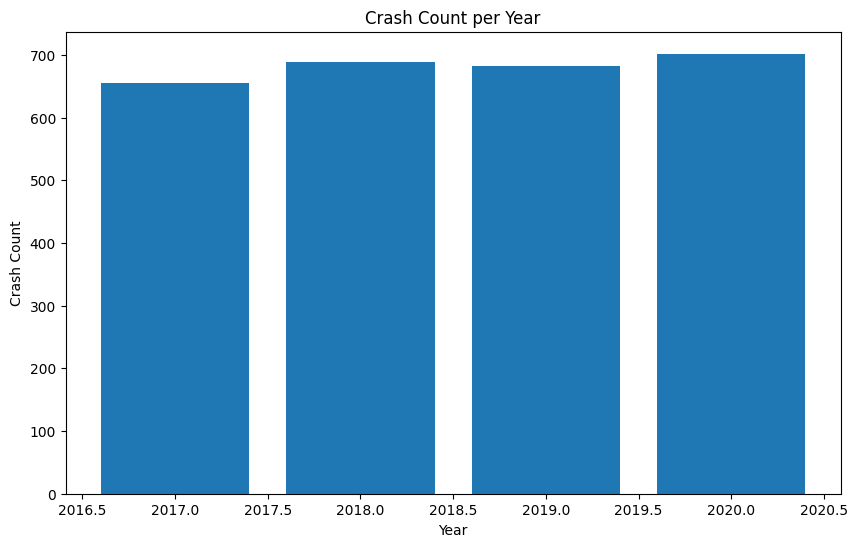

In [13]:

crash_counts_by_year = hotspots.groupby('YEAR')['YEAR'].count()

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(crash_counts_by_year.index, crash_counts_by_year.values)
plt.xlabel('Year')
plt.ylabel('Crash Count')
plt.title('Crash Count per Year')
plt.show()

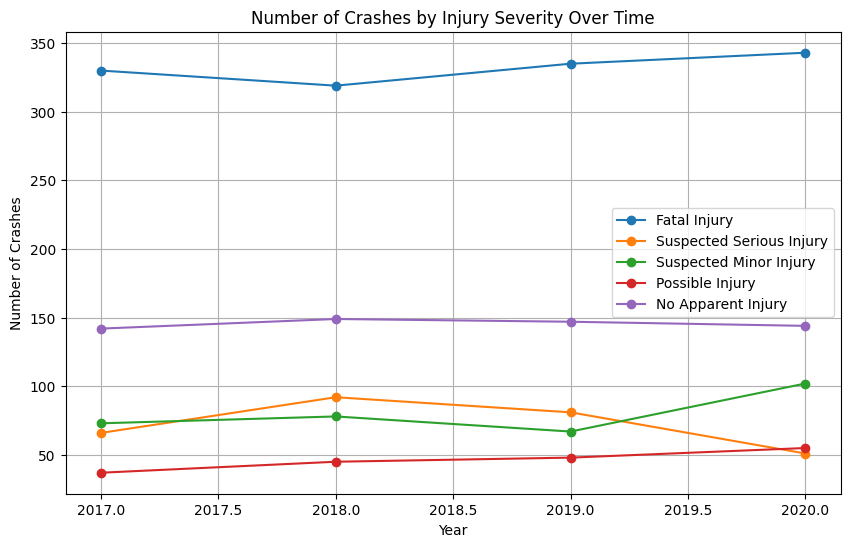

In [16]:
# Create the plot
plt.figure(figsize=(10, 6))

# Injury severity labels
injury_labels = {
    4: 'Fatal Injury',
    3: 'Suspected Serious Injury',
    2: 'Suspected Minor Injury',
    1: 'Possible Injury',
    0: 'No Apparent Injury'
}

# Group data by year and injury severity
for severity, label in injury_labels.items():
  severity_data = hotspots[hotspots['INJ_SEV'] == severity].groupby('YEAR')['YEAR'].count()
  plt.plot(severity_data.index, severity_data.values, label=label, marker='o')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Injury Severity Over Time')
plt.legend()
plt.grid(True)
plt.show()

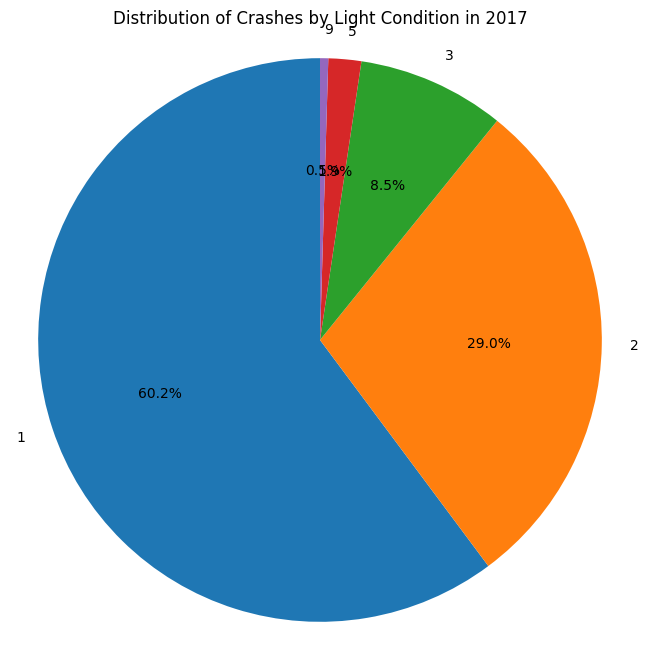

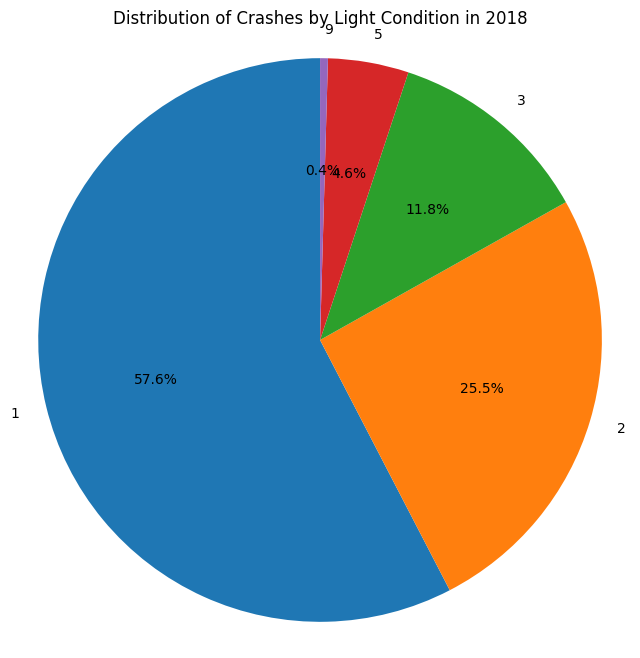

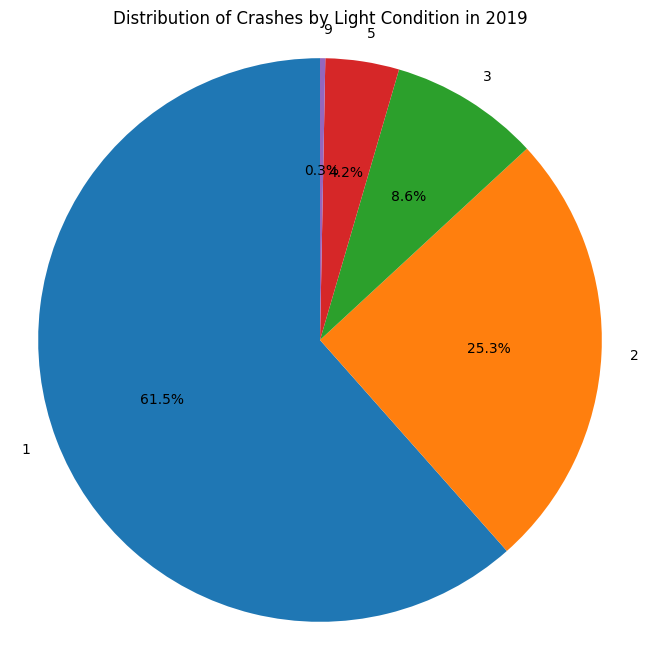

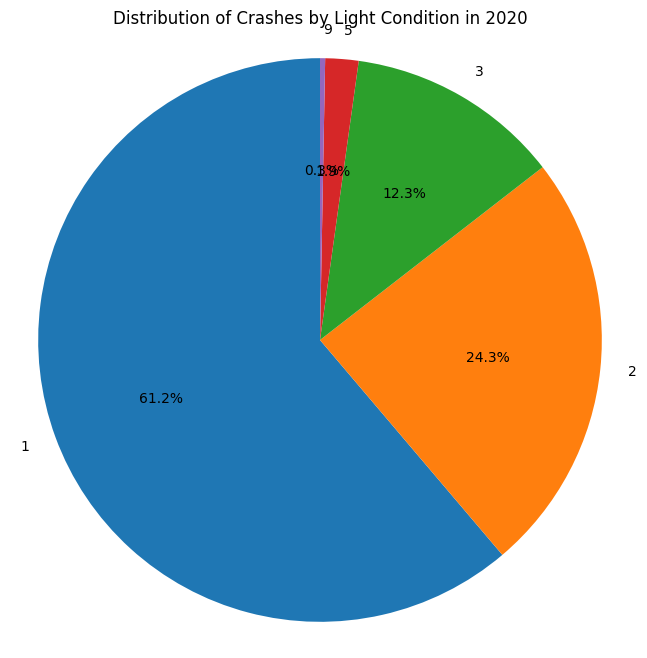

In [21]:
import matplotlib.pyplot as plt

# Group data by year and light condition, then count occurrences
light_condition_counts = hotspots.groupby(['YEAR', 'LGT_COND'])['YEAR'].count().unstack()

# Filter for the specified light conditions
light_conditions = [1, 2, 3, 5, 9]
light_condition_counts = light_condition_counts[light_conditions]

# Create the pie chart for each year
for year in light_condition_counts.index:
    plt.figure(figsize=(8, 8))
    plt.pie(light_condition_counts.loc[year], labels=light_conditions, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of Crashes by Light Condition in {year}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

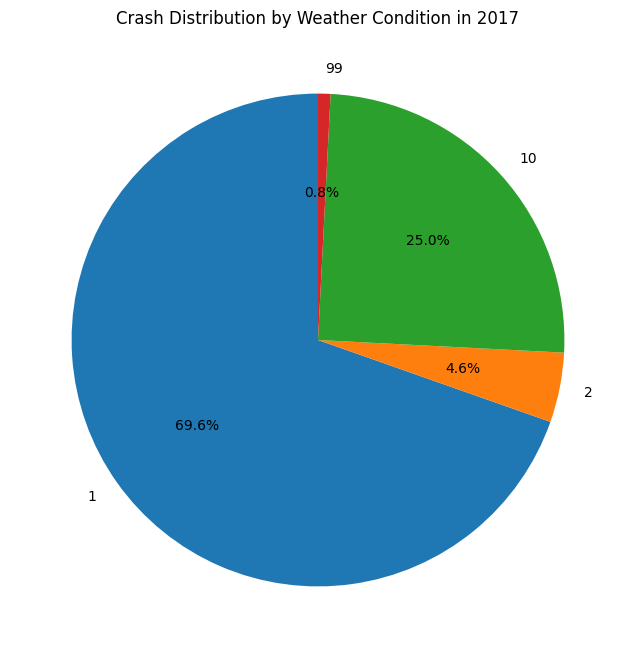

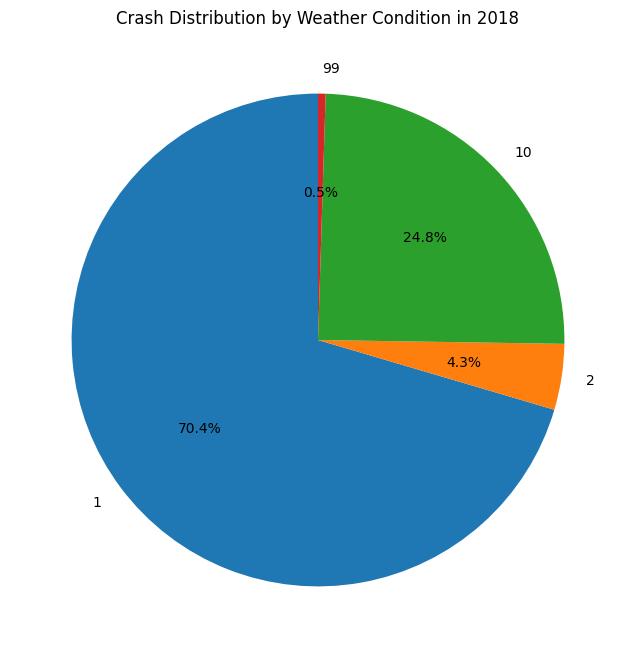

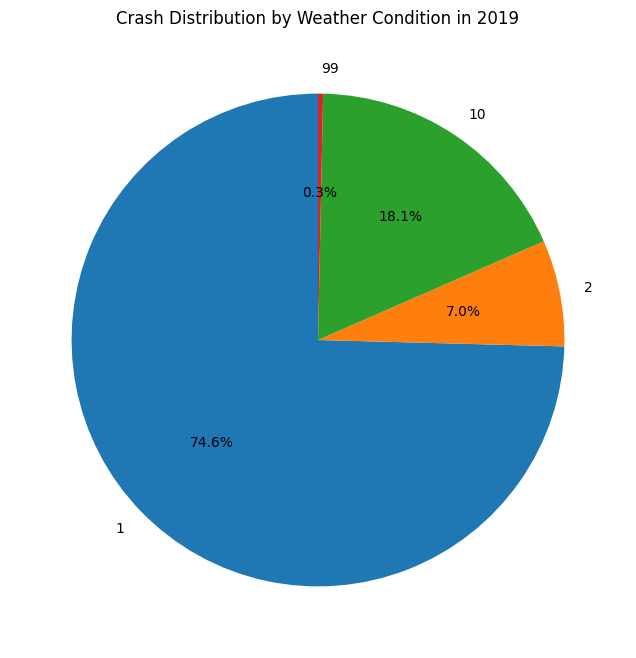

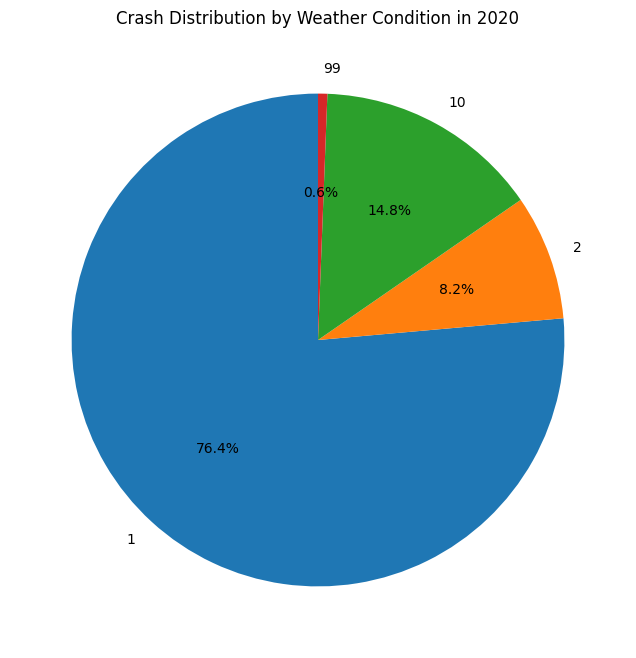

In [20]:
# prompt: there are 4 weather conditions 1,2,10 and 99. draw a pie chart of distinct years depending with respect to the crash happened in 4 weather conditions. USING HOTSPOT dataframe

import matplotlib.pyplot as plt

# Assuming 'hotspots' DataFrame is already loaded and available

# Filter for the specified weather conditions
weather_conditions = [1, 2, 10, 99]
filtered_hotspots = hotspots[hotspots['WEATHER'].isin(weather_conditions)]

# Group by year and weather condition, then count crashes
crashes_by_year_weather = filtered_hotspots.groupby(['YEAR', 'WEATHER'])['YEAR'].count().unstack()

# Create the pie chart for each year
for year in crashes_by_year_weather.index:
    year_data = crashes_by_year_weather.loc[year].dropna()  # Drop NaN values for cleaner plot
    if not year_data.empty:  # Check if there's any data for this year
      plt.figure(figsize=(8, 8))
      plt.pie(year_data, labels=year_data.index, autopct='%1.1f%%', startangle=90)
      plt.title(f'Crash Distribution by Weather Condition in {year}')
      plt.show()

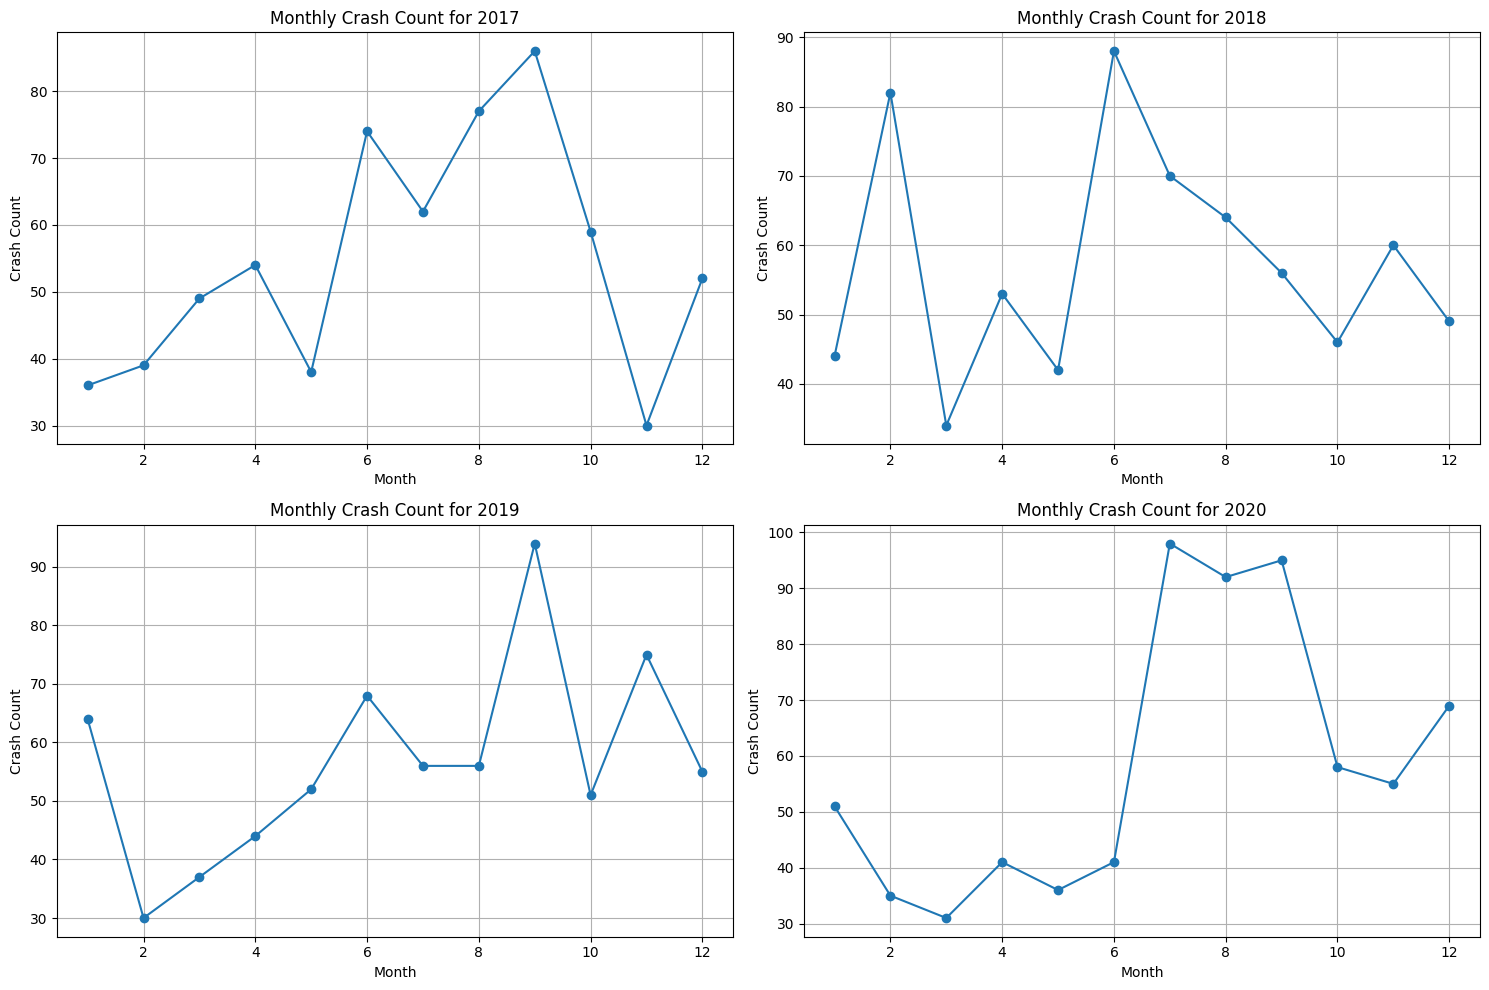

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by year and month and count the crashes
monthly_crash_counts = hotspots.groupby(['YEAR', 'MONTH_y'])['YEAR'].count().reset_index(name='Crash Count')

# Create a subplot for each year
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
years = monthly_crash_counts['YEAR'].unique()

for i, year in enumerate(years):
  row = i // 2
  col = i % 2
  ax = axes[row, col]

  year_data = monthly_crash_counts[monthly_crash_counts['YEAR'] == year]
  ax.plot(year_data['MONTH_y'], year_data['Crash Count'], marker='o')
  ax.set_xlabel('Month')
  ax.set_ylabel('Crash Count')
  ax.set_title(f'Monthly Crash Count for {year}')
  ax.grid(True)

plt.tight_layout()
plt.show()

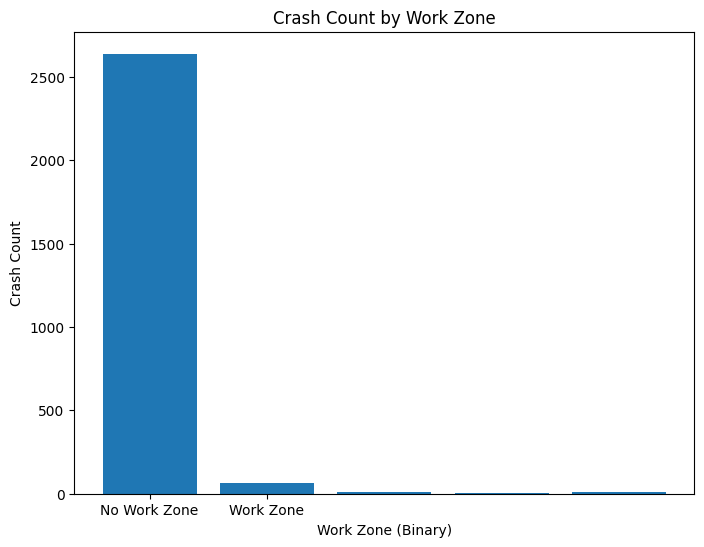

In [18]:
# Group by work zone and count crashes
crash_counts_by_work_zone = hotspots.groupby('WRK_ZONE')['WRK_ZONE'].count()

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(crash_counts_by_work_zone.index, crash_counts_by_work_zone.values)
plt.xlabel('Work Zone (Binary)')
plt.ylabel('Crash Count')
plt.title('Crash Count by Work Zone')
plt.xticks([0, 1], ['No Work Zone', 'Work Zone'])  # Set x-axis labels for binary values
plt.show()

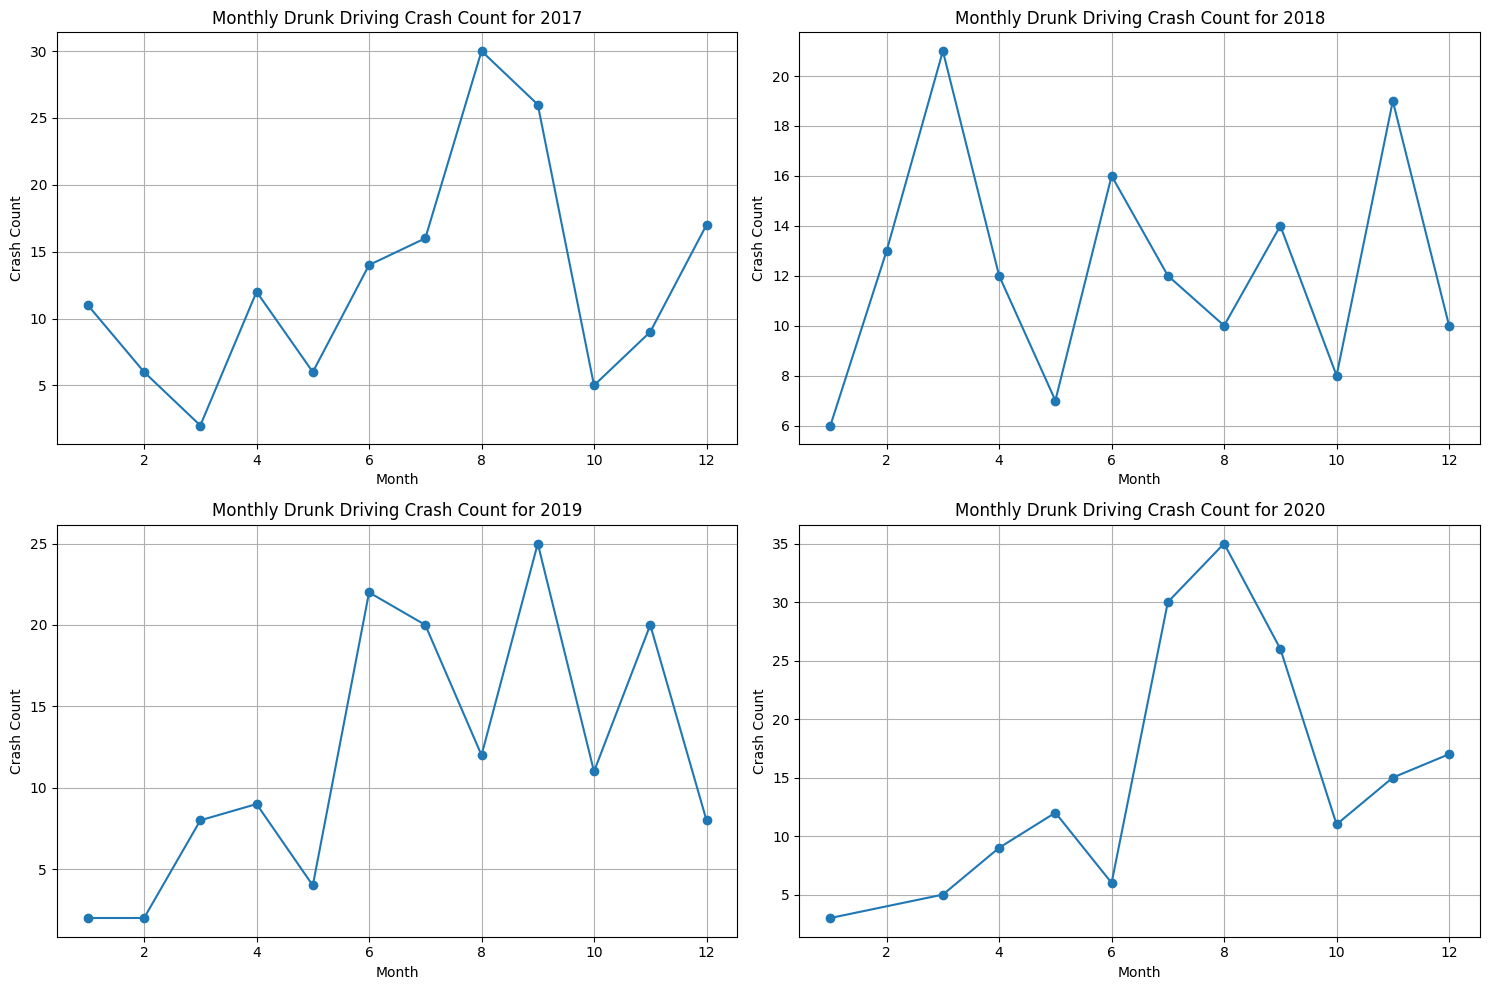

In [19]:
# Filter for crashes where the driver was drunk
drunk_driving_crashes = hotspots[hotspots['DRUNK_DR'] == 1]

# Group by year and month and count the crashes
monthly_drunk_driving_counts = drunk_driving_crashes.groupby(['YEAR', 'MONTH_y'])['YEAR'].count().reset_index(name='Crash Count')

# Create a subplot for each year
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
years = monthly_drunk_driving_counts['YEAR'].unique()

for i, year in enumerate(years):
  row = i // 2
  col = i % 2
  ax = axes[row, col]

  year_data = monthly_drunk_driving_counts[monthly_drunk_driving_counts['YEAR'] == year]
  ax.plot(year_data['MONTH_y'], year_data['Crash Count'], marker='o')
  ax.set_xlabel('Month')
  ax.set_ylabel('Crash Count')
  ax.set_title(f'Monthly Drunk Driving Crash Count for {year}')
  ax.grid(True)

plt.tight_layout()
plt.show()

## Model Training and Evaluation

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

In [ ]:
# Select all data except where 'INJ_SEV' is greater than 5



In [25]:
# crash_data = pd.read_csv("/content/combined_output.csv")
filtered_data = gdf_pedestrian_fatalities[gdf_pedestrian_fatalities['INJ_SEV'] < 5]
crash_data = filtered_data.dropna(subset=['VEH_NO','PER_NO','WEATHER1','LGT_COND','WRK_ZONE','ROUTE','FUNC_SYS_y','RUR_URB_y','HOUR_y','YEAR','MONTH_y','DAY_y','COUNTY_y','DRUNK_DR','LONGITUD', 'LATITUDE'])
print(crash_data['FATALS'])

34137     1
34138     1
34139     1
34140     1
34141     1
         ..
203690    1
203691    1
203692    1
203693    1
203694    1
Name: FATALS, Length: 2010, dtype: int64


In [26]:
X = crash_data[['VEH_NO','PER_NO','WEATHER1','LGT_COND','WRK_ZONE','ROUTE','FUNC_SYS_y','RUR_URB_y','HOUR_y','YEAR','MONTH_y','DAY_y','COUNTY_y','DRUNK_DR','LONGITUD', 'LATITUDE']] # Example features, replace with relevant columns
y = crash_data['INJ_SEV']

# Convert INJ_SEV to categories if it's not already (for confusion matrix)
y = y.astype(int)
# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Accuracy: 0.44776119402985076


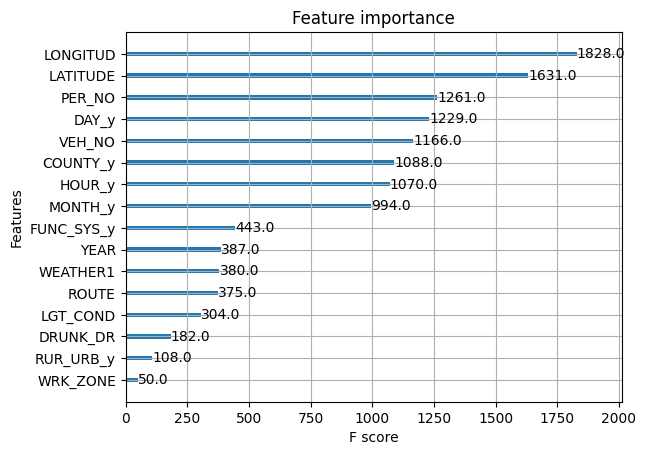

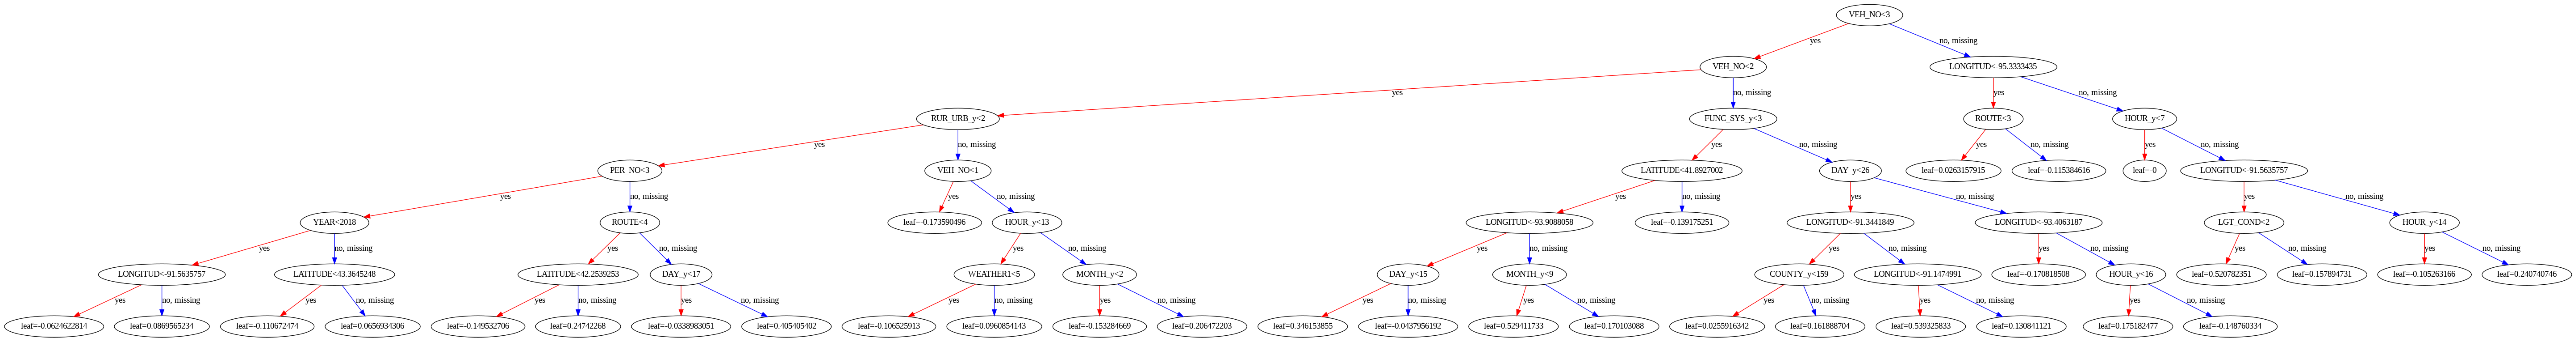

In [28]:
!pip install xgboost
import xgboost as xgb
import matplotlib.pyplot as plt

# Create an XGBoost classifier
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y_train.unique()), random_state=42)


# Train the model
model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model.predict(X_test)


# Evaluate the model (example: accuracy)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# Feature Importance Plot
xgb.plot_importance(model)
plt.show()


# Prediction Error Plot
xgb.plot_tree(model, num_trees=0)
fig = plt.gcf()
fig.set_size_inches(150, 100)
plt.show()

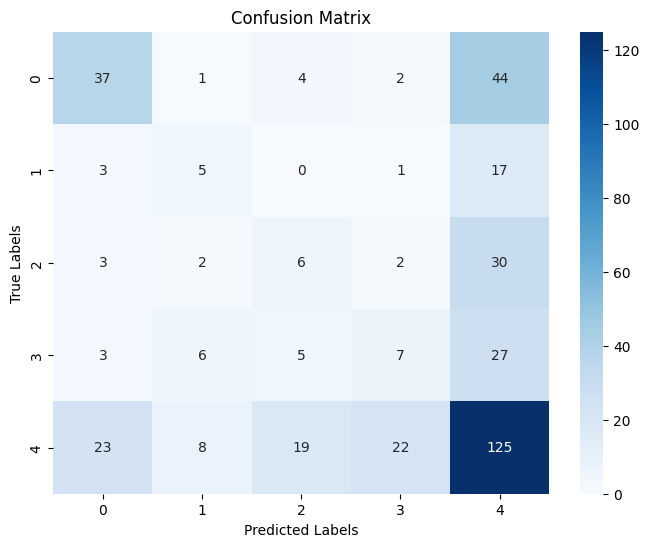

              precision    recall  f1-score   support

           0       0.54      0.42      0.47        88
           1       0.23      0.19      0.21        26
           2       0.18      0.14      0.16        43
           3       0.21      0.15      0.17        48
           4       0.51      0.63      0.57       197

    accuracy                           0.45       402
   macro avg       0.33      0.31      0.31       402
weighted avg       0.43      0.45      0.43       402



In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Generate the classification report (includes precision, recall, F1-score)
print(classification_report(y_test, y_pred))

In [31]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (example: accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.44776119402985076


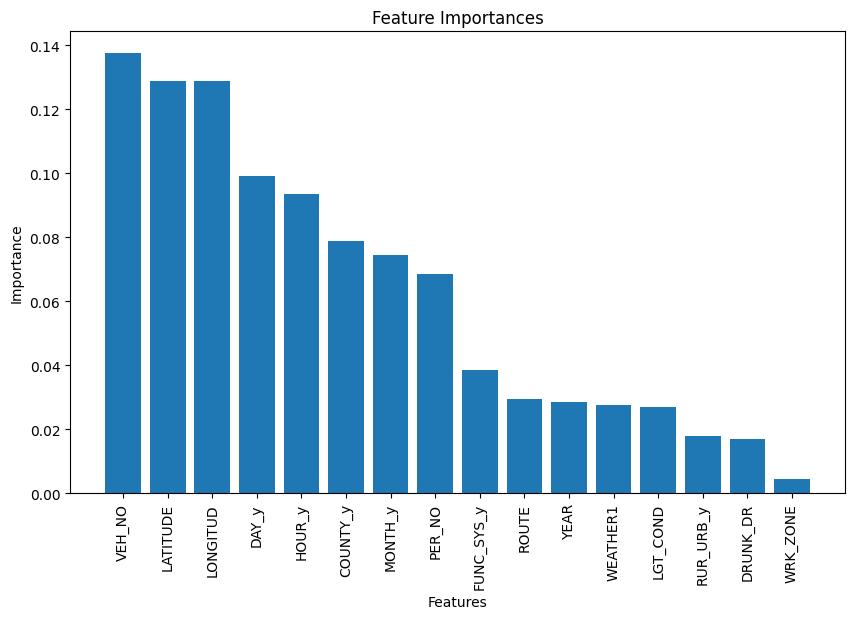

In [32]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model (example using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature Importance Visualization
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

# Convert predicted probabilities to class labels (assuming a threshold of 0.5 for example)
y_pred_class = np.round(y_pred)  # For regression, convert to classes
# y_pred_class = (y_pred > 0.5).astype(int)  # For classification with probabilities

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:")
print(cm)

# Calculate class-wise precision and recall
precision = precision_score(y_test, y_pred_class, average=None)
recall = recall_score(y_test, y_pred_class, average=None)

print("\nClass-wise Precision:")
print(precision)

print("\nClass-wise Recall:")
print(recall)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

Confusion Matrix:
[[ 13  15  36  21   3]
 [  1   4  10   9   2]
 [  0   3  17  21   2]
 [  1   2  13  27   5]
 [  0   7  52 106  32]]

Class-wise Precision:
[0.86666667 0.12903226 0.1328125  0.14673913 0.72727273]

Class-wise Recall:
[0.14772727 0.15384615 0.39534884 0.5625     0.16243655]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.15      0.25        88
           1       0.13      0.15      0.14        26
           2       0.13      0.40      0.20        43
           3       0.15      0.56      0.23        48
           4       0.73      0.16      0.27       197

    accuracy                           0.23       402
   macro avg       0.40      0.28      0.22       402
weighted avg       0.59      0.23      0.24       402

